In [11]:
import nltk ## natural language processing
import numpy as np
from bs4 import BeautifulSoup as bs ## parsing html
import os ## access other files
import json ## to save data in more accessible format
import networkx as nx

In [2]:
## iterate over all files in MusicVocab and extract sentences
## store sentences in a json file (key-value pairs)
## begin co-occurence counting

## EXTRACT PLAINTEXT function
def ext_plaintxt(dir_path: str) -> dict:
    """
    extract all text from the html files in dir
    Parameters
    ----------
    dir : str
        Relative path to directory we want to get text from, ex: 'MusicVocab_Eng2'
    """
    dir = os.fsencode(dir_path) ## get directory object from os

    plaintxt = [] ## make an empty list to store the text
    vocab = [] ## make empty list to store page titles (controlled vocab)

    for file in os.listdir(dir):
        filename = os.fsdecode(file)
        if filename.endswith('.html'): ## if it is an html file 
            filetxt = '' ## make empty str to store the file text
            with open(dir_path + '/' + filename) as f: ## open file as 'f'
                filetxt = f.read()

            ## now to use beautiful soup to extract plaintext
            ## from the html text
            soup = bs(filetxt)
            title = soup.find('h1').get_text()
            textonly = ' '.join([ p.get_text() for p in  soup.find_all('p') ])
            ## the above code produces the text of each p (aka paragraph) in one big text

            ## add to our lists
            vocab.append(title)
            plaintxt.append(textonly)

    return dict(zip(vocab, plaintxt)) ## return a key-pair matching for all vocab words

            

In [3]:
alldata = ext_plaintxt('MusicVocab_Eng2')

# data_dump = json.dumps(alldata) ## prepare data for export

# with open('controlled_vocab.json', 'w') as f:
#     f.write(data_dump)

### now that the data has been extracted, we don't need to run this
### again for this language. Therefore, I have commented out the above


In [4]:
fulltext = '. '.join([alldata[k] for k in alldata])
### this combines all text from all words into one long
### full text
fulltext

' Peiris, Eshantha. Email to Annie Liu and Ian Peiris. April 28, 2025..  Source: “The ubọ-aka serves as a medium of communication, transmitting the society’s folkways and traditions orally from one generation to another. The music conveys information, storytelling, proverbs, and idiomatic statements, allowing the listeners to learn about the mores and norms of the society.” Carter-Ényì (2024) [2.3] Definition: “The action or activity of telling stories, or a particular story; an instance of this.” (Oxford English Dictionary, “storytelling”).  Source: “Additionally, the ubọ-aka is a symbol of masculinity and manhood, reflecting the patrilineal nature of social organization among the Nri people. It also plays a role in socialization, as it is used for leisure and relaxation, and is associated with courtship and marriage, conveying love and expectations in married lives.” Carter-Ényì (2024) [2.3] Definition: “The process of forming associations with others;\xa0spec.\xa0the process by wh

In [5]:
keyword_index = { k:i for i, k in enumerate(alldata)}

In [16]:
index_keyword = {v: k for k, v in keyword_index.items()}

In [6]:
## need to split full text into sentences, then count co-occurences in the sentences
full_sentences = nltk.sent_tokenize(fulltext)

co_occurs = np.zeros((len(alldata), len(alldata)))

In [7]:
## now to count co-occurences in each sentence, adding into the matrix
for sent in full_sentences:
    s_occurs = []
    for k in alldata:
        if k in sent:
            ## k occurs in same sentence as other word(s)
            s_occurs.append(keyword_index[k])
    if len(s_occurs) <= 1:
        ## one or no keywords in sentence
        continue
    for c in s_occurs:
        for d in s_occurs:
            if c != d:
                ## add to matrix
                co_occurs[c][d] += 1

In [22]:
G = nx.from_numpy_array(co_occurs, nodelist=[index_keyword[i] for i in range(len(alldata))])

In [32]:
print(G.number_of_nodes())
print(G.number_of_edges())
print(sorted(G.degree, key=lambda x: x[1], reverse=True))

## main connected component

main_cc = [ c for c in sorted(nx.connected_components(G), key=len, reverse=True) ]
main_cc

254
821
[('commentary', 105), ('mode', 55), ('structure', 53), ('composition', 48), ('performance', 35), ('Lee commentary (2024)', 35), ('music theory', 33), ('concept', 33), ('verse', 31), ('meter', 30), ('Peiris (2024)', 29), ('speech', 28), ('timbre', 26), ('character', 25), ('flow', 25), ('theorizing', 25), ('translation', 24), ('vocable', 24), ('poetic meter', 21), ('rhythmic pattern', 20), ('drum stroke', 20), ('oral transmission', 20), ('transliteration', 20), ('Cannon-Brown (2024)', 19), ('Stover commentary (2024)', 19), ('singer', 18), ('Tenzer (2024)', 18), ('body gestures', 17), ('embellishment tones', 16), ('sensation', 16), ('Carter-Ényì (2024)', 16), ('Menezes (2024)', 15), ('opera', 15), ('accent', 15), ('Biamonte commentary (2024)', 14), ('Danielsen commentary (2024)', 13), ('syncopation', 13), ('Shumays commentary (2024)', 12), ('improvisation', 12), ('comparative', 12), ('metaphor', 11), ('tone color', 11), ('microtonal', 11), ('knowing', 11), ('storytelling', 10), ('

[{'Bauer commentary (2024)',
  'Biamonte commentary (2024)',
  'Boyd commentary (2024)',
  'Cannon-Brown (2024)',
  'Carter-Ényì (2024)',
  'Carter-Ényì commentary (2024)',
  'Chow commentary (2024)',
  'Danielsen commentary (2024)',
  'Goldberg (2024)',
  'Heterophony',
  'Igbo tonal language',
  'Indeterminacy',
  'Klangfarbenmelodie',
  'Lee commentary (2024)',
  'Li (2024)',
  'Martin commentary (2024)',
  'Menezes (2024)',
  'Park (2024)',
  'Peiris (2024)',
  'Shumays commentary (2024)',
  'Stover (2024)',
  'Stover commentary (2024)',
  'Tantrism',
  'Tenzer (2024)',
  'Villepastour commentary (2024)',
  'Wang commentary (2024)',
  'accent',
  'accent displacement',
  'accompanist',
  'actant',
  'actions',
  'agent',
  'ambiguity',
  'antecedent-consequent',
  'atonality',
  'auditory stream',
  'augmentation',
  'autonomy',
  'avant-garde experimentalism',
  'backbeat',
  'bichromatic',
  'body gestures',
  'cadential function',
  'cakewalk',
  'canon',
  'character',
  'circu

{'storytelling': array([61.95738, 88.25647], dtype=float32), 'socialization': array([143.57733,  33.18039], dtype=float32), 'cognition': array([77.83531 , 52.770947], dtype=float32), 'embellishment tones': array([-82.865486, -35.380726], dtype=float32), 'Chow commentary (2024)': array([49.171986  ,  0.09807199], dtype=float32), 'prayer': array([155.40616 , 106.715294], dtype=float32), 'recipient': array([96.4959  ,  5.986035], dtype=float32), 'structure': array([ 38.320107, -50.140553], dtype=float32), 'avant-garde experimentalism': array([8.57292  , 3.6394103], dtype=float32), 'orchestration': array([-45.084957, 126.9072  ], dtype=float32), 'pitch class': array([  11.304589, -124.53932 ], dtype=float32), 'ontology': array([ 81.46163, 141.57039], dtype=float32), 'actions': array([58.18884  ,  2.1334822], dtype=float32), 'performance': array([-19.823452, -25.316696], dtype=float32), 'folktales': array([164.17587,  87.17035], dtype=float32), 'rhythmic pattern': array([2.7779367, 8.469535

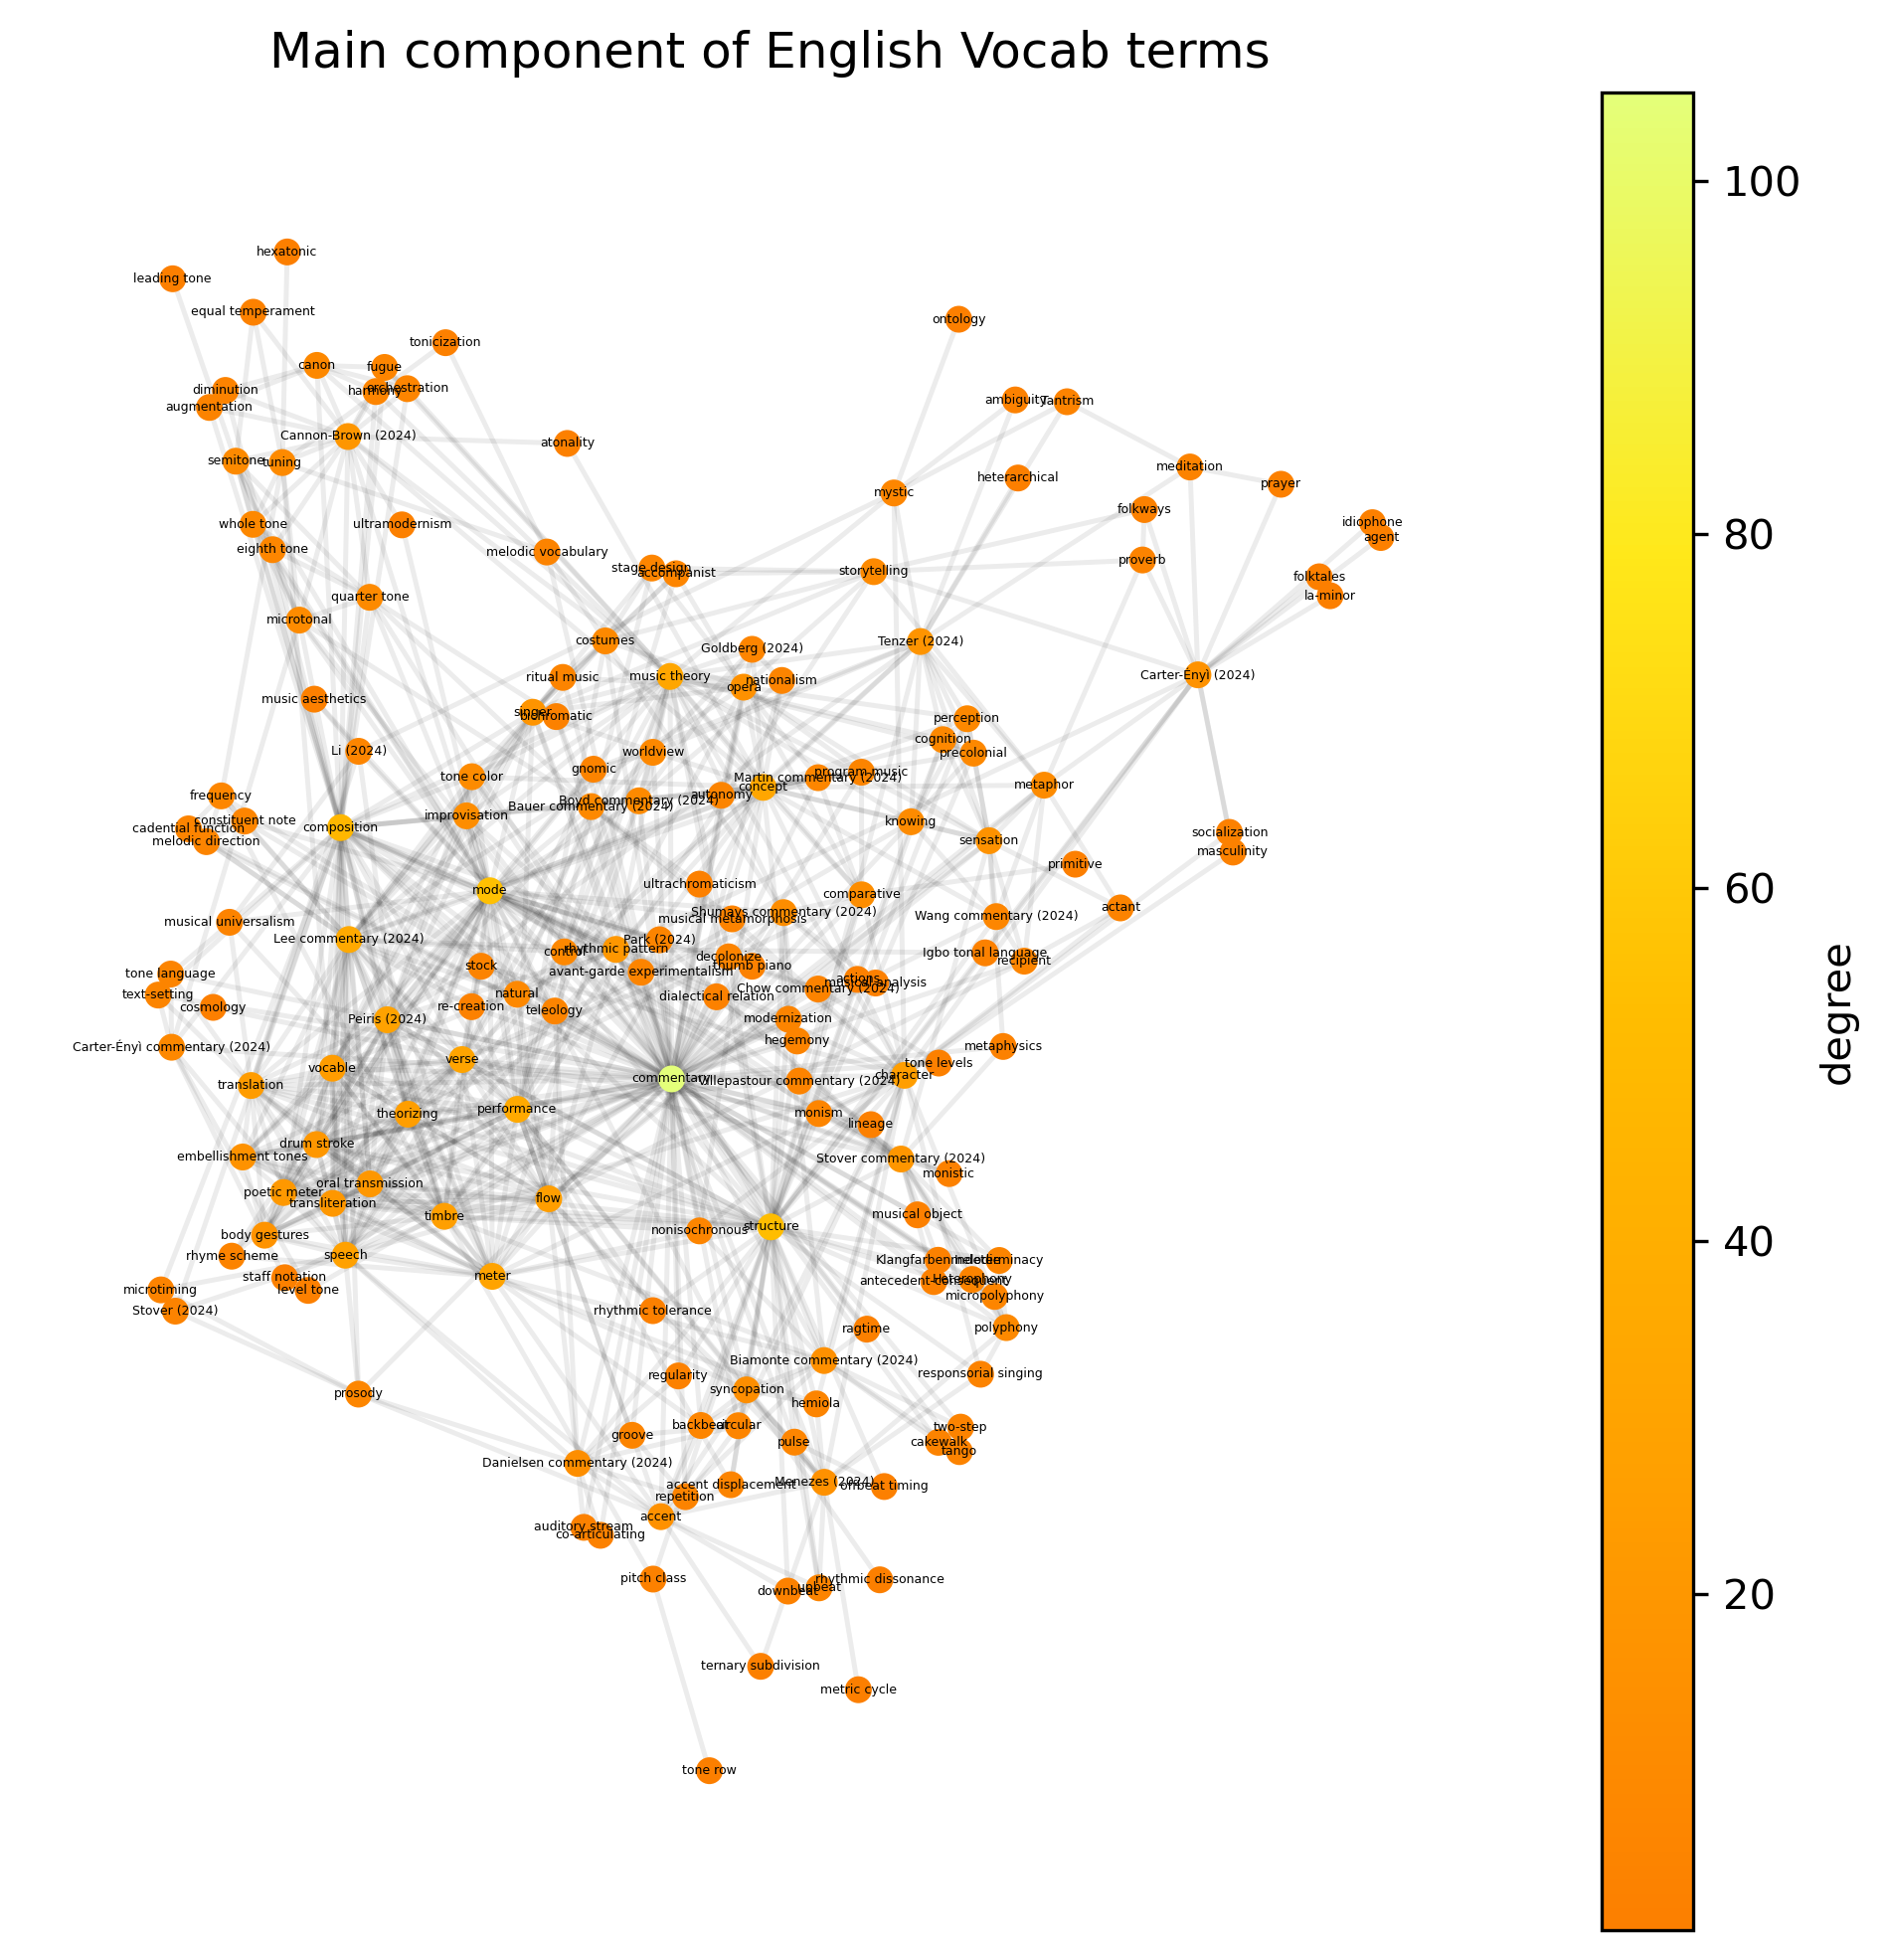

In [104]:
import matplotlib.pyplot as plt

degs = [ d[1] for d in G.subgraph(main_cc[0]).degree() ]
## degree of nodes in largest component

plt.rcParams['figure.dpi']=300
options = {
'node_size': 30,
# 'node_color': '#eca5dd',
'node_color': degs,
'edge_color': '#00000013',
'width': 1.2,
'font_size': 3
}
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
lay = nx.forceatlas2_layout(G.subgraph(main_cc[0]), seed=15)
print(lay)

lay = {k: np.array([v[0], 2 * v[1]]) for k,v in lay.items()}
print(lay)

cmap=plt.cm.Wistia_r
vmin = min(degs)
vmax = max(degs)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm, label="degree", ax=ax)

nx.draw(G.subgraph(main_cc[0]), lay, cmap='Wistia_r', with_labels=True, **options)

ax.set_title('Main component of English Vocab terms')

plt.show()

everything below this is experimental and didn't work

In [5]:
### time to do the co-occurence, please read here for more info on the process
### https://www.geeksforgeeks.org/co-occurence-matrix-in-nlp/
# nltk.download('stopwords')
# nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import pandas as pd

### these preprocessing steps are taken directly from the article, for clarity
# Preprocess the text
stop_words = set(stopwords.words('english'))
words = word_tokenize(fulltext.lower())
# words = [word for word in words if word.isalnum() and word not in stop_words]
banned = [',', ':', ';', '=', '“', '’', '‘', '(', ')', '”', '[', ']',
        '..', 'source', 'definition', 'oxford', 'dictionary', 'online', 'english',
        'music', 'theory', '2024', "''", '``', 'commentary', 'musical']
words = [word for word in words if word not in stop_words and word not in banned]

In [6]:
words

['peiris',
 'eshantha',
 '.',
 'email',
 'annie',
 'liu',
 'ian',
 'peiris',
 '.',
 'april',
 '28',
 '2025',
 'ubọ-aka',
 'serves',
 'medium',
 'communication',
 'transmitting',
 'society',
 'folkways',
 'traditions',
 'orally',
 'one',
 'generation',
 'another',
 '.',
 'conveys',
 'information',
 'storytelling',
 'proverbs',
 'idiomatic',
 'statements',
 'allowing',
 'listeners',
 'learn',
 'mores',
 'norms',
 'society.',
 'carter-ényì',
 '2.3',
 'action',
 'activity',
 'telling',
 'stories',
 'particular',
 'story',
 'instance',
 'this.',
 'storytelling',
 '.',
 'additionally',
 'ubọ-aka',
 'symbol',
 'masculinity',
 'manhood',
 'reflecting',
 'patrilineal',
 'nature',
 'social',
 'organization',
 'among',
 'nri',
 'people',
 '.',
 'also',
 'plays',
 'role',
 'socialization',
 'used',
 'leisure',
 'relaxation',
 'associated',
 'courtship',
 'marriage',
 'conveying',
 'love',
 'expectations',
 'married',
 'lives.',
 'carter-ényì',
 '2.3',
 'process',
 'forming',
 'associations',
 'o

In [7]:
## sentence context
def sentence_context(tokens, i):
    """Take sentence to be context"""
    stops = ['.', '!', '?']
    max_context = 6 ## max radius of context window
    left = None
    right = None

    for j in range(1, max_context + 1):
        if i - j <= 0:
            left = "*START*"
        elif tokens[i - j] in stops:
                left = tokens[i - j]
                break
        else:
             left = tokens[i - j]
        
    for j in range(1, max_context + 1):
        if i + j >= len(tokens) - 1:
            right = "*END*"
        elif tokens[i + j] in stops:
                right = tokens[i + j]
                break
        else:
             right = tokens[i + j]
             
    return (left, right)

In [8]:
context = nltk.text.ContextIndex(words, sentence_context)

In [9]:
## show example
sim = context.word_similarity_dict('backbeat')
sorted([ (a, sim[a]) for a in sim if sim[a] is not None and sim[a] > 0 ], key=lambda x: x[1], reverse=True)


[('backbeat', 1.0),
 ('email', 0.3333333333333333),
 ('annie', 0.3333333333333333),
 ('liu', 0.3333333333333333),
 ('ian', 0.3333333333333333),
 ('proper.', 0.3333333333333333),
 ('sheryl', 0.3333333333333333),
 ('man-ying', 0.3333333333333333),
 ('check', 0.3333333333333333),
 ('citation', 0.3333333333333333),
 ('waiguo', 0.3333333333333333),
 ('dacidian', 0.3333333333333333),
 ('外国文学大词典', 0.3333333333333333),
 ('diao', 0.3333333333333333),
 ('shaohua', 0.3333333333333333),
 ('刁绍华主编', 0.3333333333333333),
 ('ed', 0.3333333333333333),
 ('barcelona', 0.3333333333333333),
 ('i.', 0.3333333333333333),
 ('torres', 0.3333333333333333),
 ('oriol', 0.3333333333333333),
 ('1890.', 0.3333333333333333),
 ('writes', 0.3333333333333333),
 ('pangirik', 0.3333333333333333),
 ('tickles', 0.3333333333333333),
 ('tickler', 0.3333333333333333),
 ('agitation', 0.3333333333333333),
 ('mood', 0.3333333333333333),
 ('others.', 0.3333333333333333),
 ('execution', 0.3333333333333333),
 ('interpretation.', 0.3